In [1]:
from sklearn.datasets import load_diabetes

from matplotlib import pyplot as plt

from skcosmo.decomposition import PCovR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

For this, we will use the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) from sklearn.

In [2]:
mixing = 0.5

X, y = load_diabetes(return_X_y=True)
y = y.reshape(X.shape[0], -1)

X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

# Use the default regressor in PCovR

When there is no regressor supplied, PCovR uses `sklearn.linear_model.Ridge('alpha':1e-6, 'fit_intercept':False, 'tol':1e-12)`.
    
    

In [3]:
%%time
pcovr1 = PCovR(
    mixing=mixing,
    n_components=2,
)
pcovr1.fit(X_scaled, y_scaled)
print("Regressor is", pcovr1.regressor_, "\n")

Regressor is Ridge(alpha=1e-06, fit_intercept=False, tol=1e-12) 

CPU times: user 3.72 ms, sys: 2.59 ms, total: 6.32 ms
Wall time: 2.98 ms


# Use a fitted regressor

You can pass a fitted regressor to PCovR to rely on the predetermined regression parameters. Currently, scikit-cosmo supports `scikit-learn` classes `LinearModel`, `Ridge`, and `RidgeCV`, with plans to support anu regressor with similar architecture in the future.

In [4]:
regressor = Ridge(alpha=1e-6, fit_intercept=False, tol=1e-12).fit(X_scaled, y_scaled)

In [5]:
%%time
pcovr2 = PCovR(
    mixing=mixing,
    n_components=2,
    regressor=regressor
)
pcovr2.fit(X_scaled, y_scaled)
print("Regressor is", pcovr2.regressor_, "\n")

Regressor is Ridge(alpha=1e-06, fit_intercept=False, tol=1e-12) 

CPU times: user 2.48 ms, sys: 1.54 ms, total: 4.02 ms
Wall time: 1.52 ms


# Use a pre-predicted y

With `regressor='precomputed'`, you can pass a regression output $\hat{Y}$ and optional regression weights $W$ to PCovR. If `W=None`, then PCovR will determine $W$ as the least-squares solution between $X$ and $\hat{Y}$.

In [6]:
regressor = Ridge(alpha=1e-6, fit_intercept=False, tol=1e-12).fit(X_scaled, y_scaled)
Yhat = regressor.predict(X_scaled)
W = regressor.coef_

In [7]:
%%time
pcovr3 = PCovR(
    mixing=mixing,
    n_components=2,
    regressor='precomputed'
)
pcovr3.fit(X_scaled, y_scaled, W=W)

CPU times: user 1.55 ms, sys: 1.03 ms, total: 2.57 ms
Wall time: 1.07 ms


PCovR(n_components=2, regressor='precomputed', space='feature')

# Comparing Results

Because we used the same regressor in all three models, they will yield the same result.

Text(0.5, 1.0, 'Precomputed Regression Result')

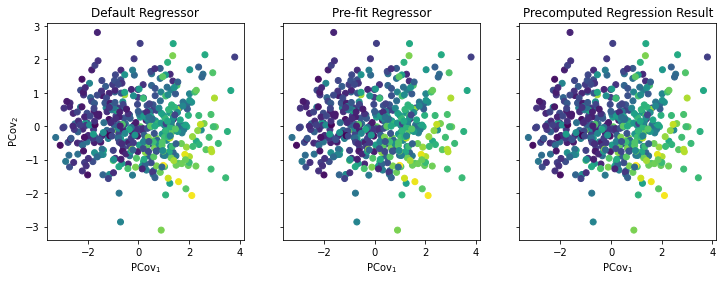

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1,
                                    3,
                                    figsize=(12, 4),
                                    sharex=True,
                                    sharey=True)

ax1.scatter(*pcovr1.transform(X_scaled).T, c=y)
ax2.scatter(*pcovr2.transform(X_scaled).T, c=y)
ax3.scatter(*pcovr3.transform(X_scaled).T, c=y)

ax1.set_ylabel("PCov$_2$")
ax1.set_xlabel("PCov$_1$")
ax2.set_xlabel("PCov$_1$")
ax3.set_xlabel("PCov$_1$")

ax1.set_title("Default Regressor")
ax2.set_title("Pre-fit Regressor")
ax3.set_title("Precomputed Regression Result")

As you can imagine, these three options have different use cases -- if you are working with a large dataset, you should always pre-fit to save on time!